<a href="https://colab.research.google.com/github/lucas-source/data-science/blob/main/Covid19/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados do Coronavírus
---
[![author](https://img.shields.io/badge/author-lucas-red.svg)](https://www.linkedin.com/in/lucas-rocha-1904a3172/)
[![GitHub](https://img.shields.io/badge/GitHub-welcome-brightgreen.svg?style=flat)](https://github.com/lucas-source)

<center><img alt="Rio de Janeiro" width="50%" src="https://i.pinimg.com/564x/25/6d/ec/256dec5e865f5f2e5a915a479f9bb4e2.jpg"></center>

  A Covid-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global.
  A covid-19  teve seus primeiros casos apresentados na cidade de Wuhan, capital da província de Hubei, na China, no final do ano de 2019.
Esse surgimento repentino da nova doença e a sua chegada em todos os continentes resultaram em um decreto de pandemia mundial, fazendo com que todos os países tivessem de tomar medidas para reduzir o avanço da COVID-19 e proteger seus cidadãos.
  Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no mundo e no Brasil, irei realizar uma análise sobre os dados públicos da doença.


## Obtenção dos Dados

Os dados usados foram obtidos a partir de um repositório no 
[GitHub](https://github.com/owid/covid-19-data/tree/master/public/data), sobre a Covid-19, do [OWID](https://ourworldindata.org/coronavirus) (Our World in Data) que é um conceituada públicação digital especializada em expor pesquisas empíricas e dados analíticos sobre os mais diversos tópicos e assuntos de interesse mundial. Foi criada por Max Roser sob tutela da universidade de Oxford em 2011.
Além de utilizar sua própria equipe de coleta de dados, o Our World in Data se valeu de informações coletadas por diversas outras instituições confiáveis ao redor do mundo.
É preciso de dizer que, apesar da confiabilidade da fonte de dados utilizada, não existe verdade absoluta. Isso se deve à infinidade de fonte de dados disponíveis e muitas vezes conflitantes a respeito da Covid-19. Por isso, esse estudo deve ser encarado apenas como informativo e não pode ser levado como tomador de decisão sob nenhuma circunstancia.


## Estrutura do código

* Primeira célula(`CovidConstructor`: class)
>Classe construtora, visa atender outros tipos de classes que tenham comportamentos diferentes, utilizando as váriaveis definidas.

* segunda célula(`InterfacCv`: class, `InterfacPs`: class, `InterfaceBr`: class)
>A fim de deixa o código de maneira escalável utilizei o conceito de [Interface](https://realpython.com/python-interface/#using-abstract-method-declaration), que é muito utilizado quando se trata de orientação a objeto.

* terceira célula(`CovidStructure`: class) -> (`CovidConstructor`: instance,`InterfacCv`: instance)
>Classe criada para apresentar toda a estrutura do DataFrame.

* quarta célula(`InfoCoutries`: class,`InfoBrasil`: class )->(`CovidConstructor`: instance, `InterfacPs`: class, `InterfaceBr`: instance)
>Classe criada para plotagem de gráfico.

In [1]:
import pandas as pd


class CovidConstructor:

    def __init__(self) -> None:
        self.df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
        self.df['date'] = pd.to_datetime(self.df['date'])
        self.gear = {}
        pd.set_option('display.max_columns', None)
        pd.set_option('display.max_rows', None)
        return


In [2]:
from abc import ABC, abstractmethod
import inspect


class InterfacCv(ABC):

    @abstractmethod
    def to_present(self) -> None:
        raise Exception(f"must implement the method: {inspect.stack()[0].function}")

    @abstractmethod
    def structure(self) -> None:
        raise Exception(f"must implement the method: {inspect.stack()[0].function}")

    @abstractmethod
    def missing_values(self) -> None:
        raise Exception(f"must implement the method: {inspect.stack()[0].function}")

    @abstractmethod
    def data_analysis(self) -> None:
        raise Exception(f"must implement the method: {inspect.stack()[0].function}")

    def tadoido(self) -> None:
        raise Exception(f"must implement the method: {inspect.stack()[0].function}")


class InterfacPs(ABC):

    @abstractmethod
    def continent_cases(self) -> None:
        raise Exception(f"must implement the method: {inspect.stack()[0].function}")

    @abstractmethod
    def country_cases(self, ax2) -> None:
        raise Exception(f"must implement the method: {inspect.stack()[0].function}")

    @abstractmethod
    def vaccinations_cases(self) -> None:
        raise Exception(f"must implement the method: {inspect.stack()[0].function}")


class InterfaceBr(ABC):

    @abstractmethod
    def structure_br(self) -> None:
        raise Exception(f"must implement the method: {inspect.stack()[0].function}")

    @abstractmethod
    def graphic_br(self) -> None:
        raise Exception(f"must implement the methodo: {inspect.stack()[0].function}")


In [ ]:
class CovidStructure(CovidConstructor, InterfacCv):

    def __init__(self) -> None:
        self.consult = None
        super().__init__()

    def to_present(self, num: int = 5) -> None:
        print(self.df.head(num))
        return

    def structure(self) -> None:
        print(f"Lines: {self.df.shape[0]}\n"
              f"Columns: {self.df.shape[1]}\n")
        print("Tipos das variáveis:")
        print(self.df.dtypes)
        return

    def missing_values(self) -> None:
        print((self.df.isnull().sum() / self.df.shape[0]).sort_values(ascending=False))
        return

    def data_analysis(self) -> None:
        print(f"Data de Início: {self.df['date'].min()}\n"
              f"Data de Fim: {self.df['date'].max()}\n")
        return


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


class InfoCoutries(CovidConstructor, InterfacPs):

    sns.set()

    def __init__(self) -> None:
        super().__init__()
        return

    def continent_cases(self) -> None:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        check = dict(self.df.groupby(self.df['location'])['total_deaths'].max().sort_values(ascending=False)[1:5])
        new_data = pd.DataFrame(check, index=[0])
        new_data.plot(cmap=plt.get_cmap('cividis'), kind="bar", ax=ax1)
        plt.xticks(rotation=50, ha='right')
        ax1.set_title('$Continents$ $with$ $more$ $cases$')
        ax1.set_xlabel('$places$ $X$')
        ax1.set_ylabel('$quantities$ $Y$')
        plt.tight_layout()
        self.country_cases(ax2)
        return

    def country_cases(self, ax2) -> None:
        country_single = dict(self.df.groupby(self.df['location'])['total_cases'].
                              max().sort_values(ascending=False)[4:5])
        biggest_countries = dict(self.df.groupby(self.df['location'])['total_cases'].
                                 max().sort_values(ascending=False)[7:11])

        self.gear.update(country_single)
        self.gear.update(biggest_countries)
        new_frame = pd.DataFrame(self.gear, index=[0])

        new_frame.plot(cmap=plt.get_cmap('bone'), kind="bar", ax=ax2)
        ax2.set_title('$Countries$ $with$ $more$ $cases$')
        ax2.set_xlabel('$places X$')
        ax2.set_ylabel('$quantities Y$')
        plt.show()
        return

    def vaccinations_cases(self) -> None:
        vaccinations_single = self.df.groupby(self.df['location'])['total_vaccinations'].max().sort_values(
            ascending=False)[2:3]
        vacina_countries = self.df.groupby(self.df['location'])['total_vaccinations'].max().sort_values(
            ascending=False)[6:8]
        self.gear.update(vaccinations_single)
        self.gear.update(vacina_countries)

        peg = []
        for i in self.gear:
            peg.append(i)

        top1 = self.df.loc[self.df.location == peg[0], "total_vaccinations"]
        top2 = self.df.loc[self.df.location == peg[1], "total_vaccinations"]
        top3 = self.df.loc[self.df.location == peg[2], "total_vaccinations"]

        figure, ax = plt.subplots(figsize=(10, 6))

        sns.lineplot(data=self.df, x=self.df.date, y=top1, label=peg[0], color='darkred')
        sns.lineplot(data=self.df, x=self.df.date, y=top2, label=peg[1], color='Gold')
        sns.lineplot(data=self.df, x=self.df.date, y=top3, label=peg[2], color='mediumblue')
        ax.set_title('$top$ $3$ $most$ $vaccinated$ $countries$')
        ax.set_xlabel('$Date X$')
        ax.set_ylabel('$quantities Y$')
        plt.show()
        return


class InfoBrasil(CovidConstructor, InterfaceBr):

    def __init__(self) -> None:
        super().__init__()
        self.br = self.df.loc[self.df.location == "Brazil"].copy()
        return

    def br_head(self) -> None:
        print(self.br.head())

    def structure_br(self) -> None:
        print(f"Início: {self.df['date'].min()}\n"
              f"Fim: {self.df['date'].max()}\n")

        first_case = self.br.loc[self.br['new_cases'] != 0.0].head(1)
        print(f"Primeiro caso de covid no Brasil {first_case.date.loc[13811]}")

        print(f"Até a data desse estudo o Brasil apresenta {self.br['total_cases'].max():,.0f} pessoa infectado covid,"
              f" e um total de {self.br['total_deaths'].max():,.0f} mortes pelo covid!")
        return

    def graphic_br(self) -> None:
        x = np.arange(533)
        y = self.br.total_vaccinations

        fig, ax = plt.subplots(figsize=(10, 4))

        sns.regplot(x, y, color="g", ax=ax, x_bins=70)
        ax.set_title('$vaccinated$ $in$ $Brazil$')
        ax.set_ylabel('$quantities Y$')
        plt.tight_layout()
        plt.show()


In [ ]:
# Data de início e fim
CovidStructure().data_analysis()

Data de Início: 2020-01-01 00:00:00
Data de Fim: 2021-08-11 00:00:00



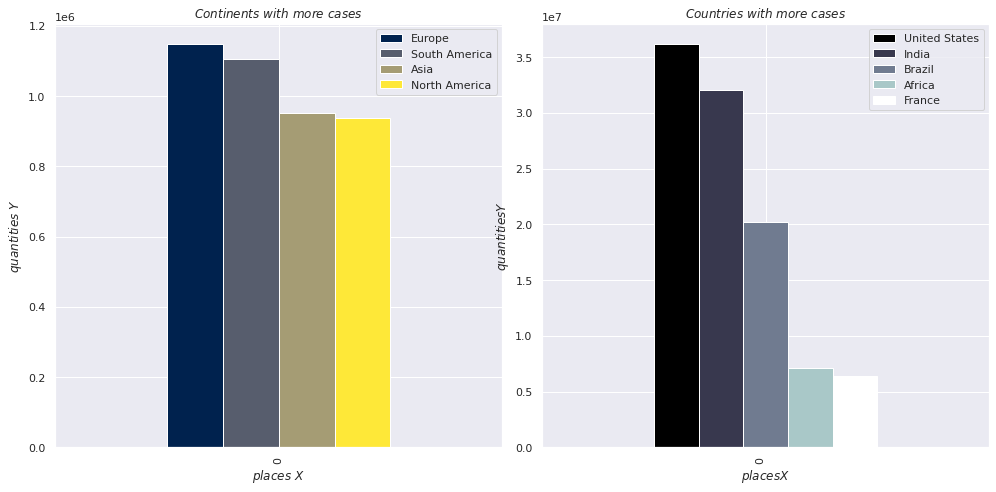

In [4]:
# 1° Gráfico - Continentes com mais casos
# 2° Gráfico - Países com mais casos
InfoCoutries().continent_cases()

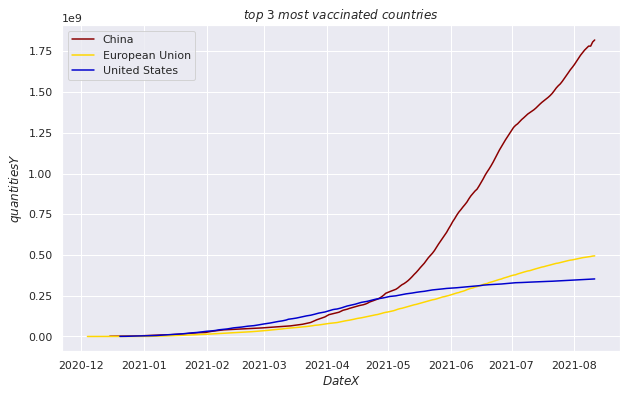

In [ ]:
# Top 3 países mais vacinados
InfoCoutries().vaccinations_cases()

In [ ]:
# Verificando o Dataset.
CovidStructure().to_present(10)

  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan 2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          1.0        0.0   
5      AFG      Asia  Afghanistan 2020-02-29          1.0        0.0   
6      AFG      Asia  Afghanistan 2020-03-01          1.0        0.0   
7      AFG      Asia  Afghanistan 2020-03-02          1.0        0.0   
8      AFG      Asia  Afghanistan 2020-03-03          2.0        1.0   
9      AFG      Asia  Afghanistan 2020-03-04          4.0        2.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                

In [ ]:
# 1° Num. de linhas e colunas
# 2° Tipos das variáveis
CovidStructure().structure()

Lines: 108888
Columns: 60

Tipos das variáveis:
iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64


In [ ]:
# Porcentagem dos valores faltantes das colunas
CovidStructure().missing_values()

weekly_icu_admissions                    0.990871
weekly_icu_admissions_per_million        0.990871
weekly_hosp_admissions                   0.982560
weekly_hosp_admissions_per_million       0.982560
excess_mortality                         0.964973
icu_patients                             0.897252
icu_patients_per_million                 0.897252
hosp_patients                            0.875781
hosp_patients_per_million                0.875781
people_fully_vaccinated_per_hundred      0.839284
people_fully_vaccinated                  0.839284
new_vaccinations                         0.836832
people_vaccinated                        0.811954
people_vaccinated_per_hundred            0.811954
total_vaccinations_per_hundred           0.803486
total_vaccinations                       0.803486
new_vaccinations_smoothed_per_million    0.653066
new_vaccinations_smoothed                0.653066
total_tests                              0.561035
total_tests_per_thousand                 0.561035


## Análise Exploratória do Brasil

Agora que já temos uma noção dos acontecimentos no mundo, vamos focar nos acontecimentos no Brasil.

In [ ]:
InfoBrasil().structure_br()

Início: 2020-01-01 00:00:00
Fim: 2021-08-11 00:00:00

Primeiro caso de covid no Brasil 2020-02-26 00:00:00
Até a data desse estudo o Brasil apresenta 20,245,085 pessoa infectado covid, e um total de 565,748 mortes pelo covid!


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


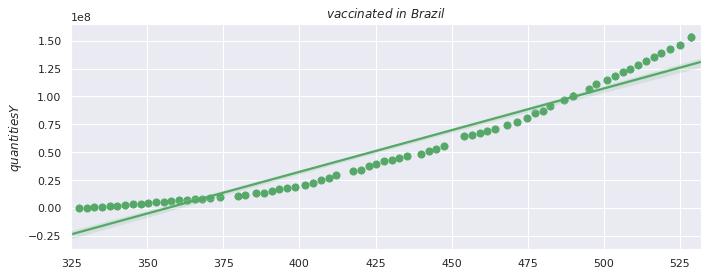

In [ ]:
InfoBrasil().graphic_br()